## Pseudocode

### What is Pseudocode?
Pseudocode is a simplified and structured way to represent algorithms or solutions to problems without relying on the specific syntax of any programming language. It uses plain language and a logical structure to outline the steps in a program.

### Why Use Pseudocode?
1. **Organizing your thoughts/strategy** By thinking through the steps of a solution, you'll fine-tune your approach.
2. **Language Independence:** Pseudocode focuses on the *logic* of the algorithm rather than implementation details, making it accessible regardless of the programming language.
3. **Problem Decomposition:** It breaks a problem into smaller, manageable parts before coding, aiding in planning and understanding.
4. **Collaborative Understanding:** Since pseudocode is language-agnostic, it can be easily understood by both programmers and non-programmers.

---

### Example: Motion in a 2D Anharmonic Oscillator

**Problem:**  
Simulate the motion of a particle in a 2D anharmonic oscillator potential:  

$$
V(x, y) = \frac{1}{2}k(x^2 + y^2) + \alpha (x^4 + y^4)
$$

where \(k\) is the harmonic constant and $\alpha$ is the anharmonic constant.

---

### Example pseudocode for this problem:
1. **Define constants**: Harmonic constant ($k$), anharmonic constant ($\alpha$), mass ($m$), and time step ($\Delta t$).
2. **Initialize variables**:
   - Initial position ($x_0, y_0$).
   - Initial velocity ($v_{x0}, v_{y0}$).
3. **Set up a first-order system of equations** to feed into a differential equation solver:
   - Compute the force components using derivatives of the potential:
     $$
     F_x = -\frac{\partial V}{\partial x}, \quad F_y = -\frac{\partial V}{\partial y}
     $$
   - Define a function which takes in positions and velocities and outputs their time derivatives.
4. **Use a differential equation solver** to integrate the system over time:
   - Pass the function and initial conditions to the solver.
5. **Extract the results**:
   - Retrieve positions ($x, y$) at each time step.
6. **Plot the trajectory** of the particle in the 2D plane.
7. **Explore physics and test code** by adjusting parameters. (e.g. for $\alpha=0$ we have an analytical solution for comparison, which we could plot alongside the numerical results to evaluate accuracy. We could also superimpose the trajectories on a contour plot of the potential energy to test our understanding.)

---

### Key Takeaways:
1. The pseudocode above is **independent of programming language**. You could implement it in Python, C++, Java, or any other language with minor modifications.
2. By focusing on the *logic* of the algorithm, pseudocode ensures that the solution is robust and adaptable to any programming environment.
3. Translating this pseudocode into Python or any other language would involve writing loops, handling arrays, and using basic arithmetic operations.

---

In [1]:
# pseudocode for python
# import needed packages
# define constants
# derive system of equations (analytic or sympy, or both for comparison)
# define first-order system of equations as a custom function
# initialize positions and velocities
# solve with differential eqaution solver
# extract solution
# plot trajectories
# embed code in ipywidgets environment to explore physics and code

In [2]:
# expanded pseudocode for python

# import necessary packages
# e.g., numpy, matplotlib, scipy.integrate, ipywidgets

# define constants (k, alpha, m, delta_t or number of timesteps)

# derive system of equations
# e.g., analytical approach or use sympy to compute derivatives of the potential

# define first-order system of equations as a function
# Input: positions, velocities, time
# Output: time derivatives

# initialize positions, velocities, and time span

# solve the system using a differential equation solver
# e.g., scipy.integrate.solve_ivp

# extract the solution
# (positions and velocities over time)

# plot results:
# - trajectory (x, y) in 2D
# - contour plot of the potential energy with trajectory overlay
# - compare numerical trajectory with analytical solution (if applicable)

# embed in an ipywidgets environment
# add sliders for k, alpha, m, delta_t, etc., to explore parameter effects


# Write pseudocode for the following problem

On our second midterm and in the following classes, we explored the dynamics of anharmonic oscillators by numerically extracting the angular frequency as a function of the initial displacement of the oscillator, $Q_0$. Now that we have some experience with this sort of problem, we can apply the approach to other problems.

Write pseudocode and expanded pseudocode for extracting and plotting the angular frequency of an anharmonic oscillator with the potential energy 

$$U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6,$$

where $K$, $D$, and $\Phi$ are positive. 

How do you think changing the value of D will change the behavior? You may want to plot the potential and explore what happens as you change $D$ to help you think though a strategy.

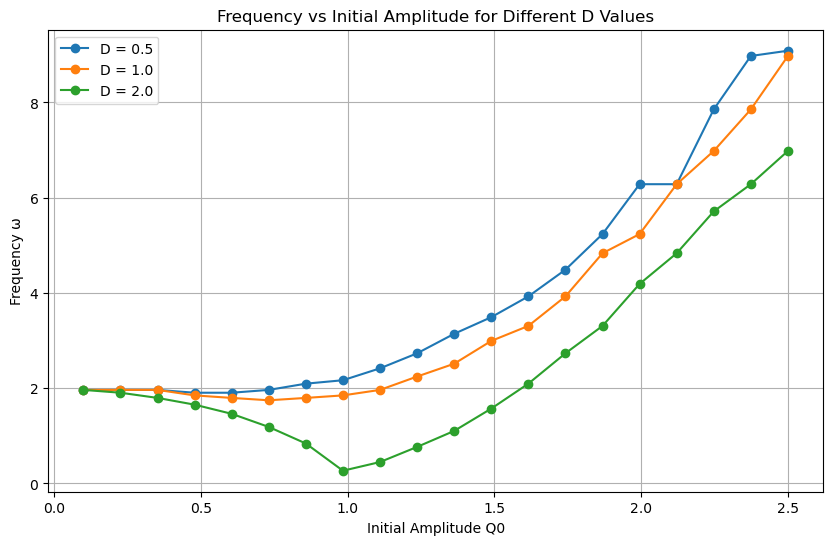

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
K, Φ, m = 1, 1, 1  
D_values = [0.5, 1.0, 2.0]  # Different quartic term strengths
Q0_values = np.linspace(0.1, 2.5, 20)  # Initial amplitudes

def force(Q, K, D, Φ):
    #Force derived from potential energy: F = -dU/dQ
    return -K * Q + D * Q**3 - Φ * Q**5

def equation_of_motion(t, y, K, D, Φ):
    #System of first-order ODEs: dQ/dt = velocity, d(velocity)/dt = F(Q)/m
    Q, velocity = y
    dQdt = velocity
    d2Qdt2 = force(Q, K, D, Φ) / m
    return [dQdt, d2Qdt2]

def find_frequency(Q0, K, D, Φ):
    #Calculate frequency based on zero-crossings
    initial_conditions = [Q0, 0]  # Q=Q0, dQ/dt=0
    sol = solve_ivp(equation_of_motion, [0, 100], initial_conditions, args=(K, D, Φ), max_step=0.1)
    Q = sol.y[0]
    t = sol.t
    zero_crossings = np.where(np.diff(np.sign(Q)))[0]
    if len(zero_crossings) < 2:
        return None
    period = t[zero_crossings[1]] - t[zero_crossings[0]]
    return 2 * np.pi / period

# Plotting frequencies for different D values
plt.figure(figsize=(10, 6))
for D in D_values:
    frequencies = [find_frequency(Q0, K, D, Φ) for Q0 in Q0_values]
    plt.plot(Q0_values, frequencies, 'o-', label=f"D = {D}")

plt.xlabel("Initial Amplitude Q0")
plt.ylabel("Frequency ω")
plt.title("Frequency vs Initial Amplitude for Different D Values")
plt.legend()
plt.grid(True)
plt.show()


### Observed Behavior of Frequency with Varying \(D\)

1. **Effect of \(D\):**
   - \(D\) controls the strength of the quartic term in the potential energy.
   - For smaller \(D\), the potential energy behaves more like a simple harmonic oscillator (\( \propto Q^2 \)).
   - For larger \(D\), the anharmonic quartic term (\( \propto Q^4 \)) becomes dominant, especially at larger amplitudes (\(Q_0\)).

2. **Frequency vs. Amplitude:**
   - As \(Q_0\) increases:
     - For small \(D\), the frequency decreases gradually.
     - For large \(D\), the frequency drops faster because the quartic term flattens the potential, reducing the restoring force.
   - This behavior highlights the transition from harmonic to anharmonic behavior.

3. **Comparison:**
   - Larger \(D\) reduces the restoring force at larger amplitudes, leading to a more significant frequency drop.
   - Smaller \(D\) results in behavior closer to that of a simple harmonic oscillator.

4. **Conclusion:**
   - The anharmonic term (\(Q^4\)) introduces amplitude dependence to the frequency.
   - Larger \(D\) makes this effect more pronounced, demonstrating the importance of anharmonic corrections in systems with large displacements.
